In [28]:
import os
import sys
import glob
from importlib import reload

from matplotlib import pyplot as plt

import scipy.ndimage as ndimage
import scipy.spatial as spatial
import numpy as np
import pandas as pd

import tifffile as tf

In [62]:
raw_src = '../temp_output/S070/'
src = raw_src + 'l0_Blue_seeds/'

img_files = sorted(glob.glob(src+'seed_*.tif'))

img_file = img_files[7]

_ , fname = os.path.split(img_file)
bname = os.path.splitext(fname)[0]


rname = '_'.join(bname.split('_')[:-1])
lname = bname.split('_')[-1]

dst = raw_src + rname + '/'
if not os.path.isdir(dst):
    os.makedirs(dst)

img = tf.imread(img_file)
struc = ndimage.generate_binary_structure(img.ndim, 2)
print(img.shape)
img_files

(61, 65, 63)


['../temp_output/S070/l0_Blue_seeds/seed_00_0_x172_y97_z251.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_01_0_x127_y91_z469.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_02_0_x205_y114_z437.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_03_0_x161_y103_z325.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_04_0_x110_y78_z536.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_05_0_x186_y105_z506.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_06_0_x185_y47_z495.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_07_0_x225_y64_z353.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_08_0_x191_y52_z319.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_09_0_x142_y93_z647.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_10_0_x148_y95_z393.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_11_0_x84_y80_z602.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_12_0_x161_y34_z531.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_13_0_x182_y150_z430.tif',
 '../temp_output/S070/l0_Blue_seeds/seed_14_0_x163_y148_z316.tif',
 '../t

# Raw spike

In [55]:
raw_file = 'raw_S070_l0_x77_y24_z1.tif'
raw = tf.imread(raw_src + raw_file)

In [63]:
pad = 7
x = int(bname.split('_')[3][1:])
y = int(bname.split('_')[4][1:])
z = int(bname.split('_')[5][1:])
x -= pad
y -= pad
z -= pad
d,h,w = img.shape 
rseed = raw[z:(z+d), y:(y+h), x:(x+w)]

In [64]:
print(rseed.shape)
print(bname)
bin_img = img.copy()
bin_img[bin_img > 0] = 1
diff = rseed*(1-bin_img)

(61, 65, 63)
seed_07_0_x225_y64_z353


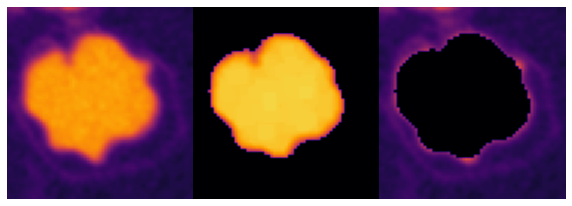

In [65]:
k = 25
ss = np.s_[k,:, :]

fig, ax = plt.subplots(1,3,figsize=(10,5), facecolor='black')

ax[0].imshow(rseed[ss], cmap='inferno', origin='lower', vmin=0, vmax=255)
ax[1].imshow(img[ss], cmap='inferno', origin='lower', vmin=0, vmax=255)
ax[2].imshow(diff[ss], cmap='inferno', origin='lower', vmin=0, vmax=255)

for i in range(len(ax)):
    ax[i].axis('off');

fig.patch.set_visible(False)
#plt.tight_layout();
plt.subplots_adjust(hspace = 0, wspace=0)


filename = dst + bname + '_X{0:04d}.jpg'.format(k)

plt.savefig(filename, dpi=72, format='jpg', pil_kwargs={'optimize': True}, bbox_inches='tight' )
#plt.close()

In [66]:
k = 800
for k in range(img.shape[0]):
    if k%100 == 0:
        print(k)
    ss = np.s_[k, :, :]

    fig, ax = plt.subplots(1,3,figsize=(10,5), facecolor='black')

    ax[0].imshow(rseed[ss], cmap='inferno', origin='lower', vmin=0, vmax=255)
    ax[1].imshow(img[ss], cmap='inferno', origin='lower', vmin=0, vmax=255)
    ax[2].imshow(diff[ss], cmap='inferno', origin='lower', vmin=0, vmax=255)

    for i in range(len(ax)):
        ax[i].axis('off');
    
    fig.patch.set_visible(False)
    plt.subplots_adjust(hspace = 0, wspace=0)
    filename = dst + bname + '_X{0:04d}.jpg'.format(k)
    
    plt.savefig(filename, dpi=72, format='jpg', pil_kwargs={'optimize': True}, bbox_inches='tight' )
    plt.close()

0


In [67]:
for k in range(img.shape[1]):
    if k%100 == 0:
        print(k)
    ss = np.s_[:, k, :]

    fig, ax = plt.subplots(1,3,figsize=(10,5), facecolor='black')

    ax[0].imshow(rseed[ss], cmap='inferno', origin='lower', vmin=0, vmax=255)
    ax[1].imshow(img[ss], cmap='inferno', origin='lower', vmin=0, vmax=255)
    ax[2].imshow(diff[ss], cmap='inferno', origin='lower', vmin=0, vmax=255)

    for i in range(len(ax)):
        ax[i].axis('off');
    
    fig.patch.set_visible(False)
    plt.subplots_adjust(hspace = 0, wspace=0)
    filename = dst + bname + '_Y{0:04d}.jpg'.format(k)
    
    plt.savefig(filename, dpi=72, format='jpg', pil_kwargs={'optimize': True}, bbox_inches='tight' )
    plt.close()

0


In [68]:
for k in range(img.shape[2]):
    if k%100 == 0:
        print(k)
    ss = np.s_[:, :, k]

    fig, ax = plt.subplots(1,3,figsize=(10,5), facecolor='black')

    ax[0].imshow(rseed[ss], cmap='inferno', origin='lower', vmin=0, vmax=255)
    ax[1].imshow(img[ss], cmap='inferno', origin='lower', vmin=0, vmax=255)
    ax[2].imshow(diff[ss], cmap='inferno', origin='lower', vmin=0, vmax=255)

    for i in range(len(ax)):
        ax[i].axis('off');
    
    fig.patch.set_visible(False)
    plt.subplots_adjust(hspace = 0, wspace=0)
    filename = dst + bname + '_Z{0:04d}.jpg'.format(k)
    
    plt.savefig(filename, dpi=72, format='jpg', pil_kwargs={'optimize': True}, bbox_inches='tight' )
    plt.close()

0
